In [1]:
import wave
import numpy as np
from scipy.io import wavfile
import math
import matplotlib.pyplot as plt 
#import subprocess as sp

#Eventuale conversione MP3 -> WAV con ffmpeg
#cmdffmpeg = "./ffmpeg -i Piano2.mp3 -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav Piano2.wav"
#print(cmdffmpeg)
#sp.call(cmdffmpeg) # Esegue il comando ffmpeg

# Trasformazione del segnale WAV in Array di interi
ifile = wave.open("Bm.wav") #Per testare i vari samples cambiare la lettera iniziale con una dalla a alla g in entrambe le occorrenze
samples = ifile.getnframes()
audio = ifile.readframes(samples)
data = np.frombuffer(audio, dtype=np.int16)
datacomplex = data.astype(np.complex64)


f_sr, x = wavfile.read("Bm.wav") #Per testare i vari samples cambiare la lettera iniziale con una dalla a alla g in entrambe le occorrenze
f_ref = 65.4

Text(0.5, 1.0, 'Initial waveform')

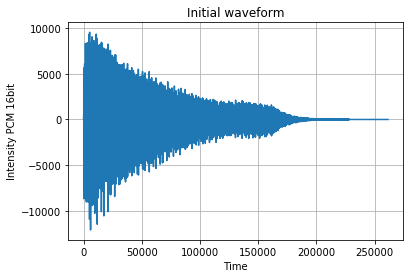

In [2]:
# Grafico forma d'onda iniziale
plt.figure()
plt.grid(True)
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Intensity PCM 16bit")
plt.title("Initial waveform")

In [3]:
# Formule per computare il cromagramma

def p(k):
    if(k == 0):
        return -1
    else:
        return math.floor(12*math.log((k/N*f_sr/f_ref),2))%12

def PCP(P):
    sum = 0
    for k in range(round(N/2)-1):
        if(p(k) == P):
            sum += abs(X[k])**2
    return sum


In [4]:
def stampa(vec):
    a = np.argsort(vec)
    print("")
    for i in range(12):
        if (a[i] == 0):
            print("Do")
        elif (a[i] == 1):
            print("Do#")
        elif (a[i] == 2):
            print("Re")
        elif (a[i] == 3):
            print("Re#")
        elif (a[i] == 4):
            print("Mi")
        elif (a[i] == 5):
            print("Fa")
        elif (a[i] == 6):
            print("Fa#")
        elif (a[i] == 7):
            print("Sol")
        elif (a[i] == 8):
            print("Sol#")
        elif (a[i] == 9):
            print("La")
        elif (a[i] == 10):
            print("La#")
        elif (a[i] == 11):
            print("Si")
    print("")

In [5]:
# Calcolo FFT

X = np.fft.fft(data, 4096)
N = len(X)
fftabs = abs(X)
freqs = np.fft.fftfreq(N)
freqs = freqs*100000

Text(0.5, 1.0, 'FFT')

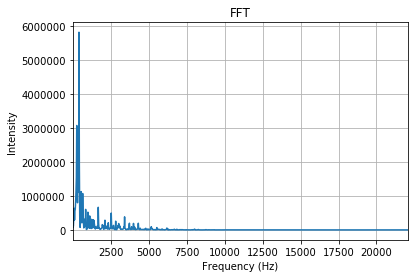

In [6]:
# Grafico FFT

plt.figure()
plt.xlim( [10, f_sr/2.] )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.ylabel("Intensity")
plt.plot(freqs[:int(freqs.size/2.)],fftabs[:int(freqs.size/2.)])
plt.title("FFT")

In [7]:
# Creazione del PCP (o Cromagramma) 12-dimensionale

chromagram = np.zeros(12)
for i in range(12):
    chromagram[i] = np.log(PCP(i))

note = ["Do", "Do#", "Re", "Re#", "Mi", "Fa", "Fa#", "Sol", "Sol#", "La", "La#", "Si", 
        "Dom", "Do#m", "Rem", "Re#m", "Mim", "Fam", "Fa#m", "Solm", "Sol#m", "Lam", "La#m", "Sim"]
    
#for i in range(12):
    #print(note[i] + ": " + str((chromagram[i]-min(chromagram)) / (max(chromagram) - min(chromagram))))

#stampa(chromagram)

In [8]:
# Creazione dei CTT

CTT = []
CTT.append([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
for i in range(1, 12):
    a = 0
    temp1 = CTT[i-1];
    temp2 = []
    count = 0;
    for j in range(12):
        a = temp1[(j-1)%12]
        temp2.append(a)
        count+=1
    CTT.append(temp2)

CTT.append([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])
for i in range(1,12):
    a = 0
    temp1 = CTT[i+11];
    temp2 = []
    count = 0;
    for j in range(12):
        a = temp1[(j-1)%12]
        temp2.append(a)
        count+=1
    CTT.append(temp2)
#CTT

In [9]:
# Funzioni punteggio

def score_nn():
    nn_vec = []
    sum = 0;
    for i in range(24):
        for p in range(12):
            sum += (CTT[i][p] - chromagram[p])**2
        nn_vec.append(sum)
        sum = 0
    return nn_vec

def score_ws():
    ws_vec = []
    sum = 0;
    for i in range(24):
        for p in range(12):
            sum += (CTT[i][p] * chromagram[p])
        ws_vec.append(sum)
        sum = 0
    return ws_vec

In [10]:
nn_vec = score_nn()
ws_vec = score_ws()

In [11]:
#for i in range(24):
    #print(note[i] + ": " + str((nn_vec[i]-min(nn_vec)) / (max(nn_vec) - min(nn_vec))))
#print("")

#for i in range(24):
    #print(note[i] + ": " + str((ws_vec[i]-min(ws_vec)) / (max(ws_vec) - min(ws_vec))))
#print("")

In [12]:
print(note[np.argsort(nn_vec)[0]])
print(note[np.argsort(ws_vec)[23]])

La#
La#
